## reducing dimensionality and working with unkown coordinates 

When loading volumetric data into yt from xarray, there are a number of situations that may need some extra handling. 

1. The first situation is when the data contain a time dimensions (as is common in many cf-compliant netcdfs). In this case, we'll need to select the time to load into yt. 
2. It is also possible that the coordinates for a variable may not be recognized by yt, in which case we need to tell yt how to interpret those coordinates. 


The following dataset (one of the sample datasets for yt's `nc_cm1` frontend) meets both these situations:

In [2]:
import xarray as xr 
import yt_xarray 
import yt

ds = yt_xarray.open_dataset('cm1_tornado_lofs/nc4_cm1_lofs_tornado_test.nc')
ds.dbz.dims

('time', 'zh', 'yh', 'xh')

to load into yt, we'll need to map out how to relate these spatial coordinates to those expected by yt. We can do so using adding to the `yt_xarray.known_coord_aliases` dictionary by adding a new key for our particular coordinate that points to the standard yt names:

In [3]:
yt_xarray.known_coord_aliases['xh'] = 'x'
yt_xarray.known_coord_aliases['yh'] = 'y'
yt_xarray.known_coord_aliases['zh'] = 'z'

additionally, we will need to provide the timestep that we want to load. To do so, you can pass a selection dictionary to the `ds.yt.load_uniform_grid` method using the `sel_dict` keyword parameter, as you would to the xarray `DataArray.isel` or `DataArray.sel` methods. 

yt : [INFO     ] 2022-10-17 14:30:45,962 Parameters: current_time              = 5500.0
yt : [INFO     ] 2022-10-17 14:30:45,963 Parameters: domain_dimensions         = [51 48 53]
yt : [INFO     ] 2022-10-17 14:30:45,963 Parameters: domain_left_edge          = [ 4.99999989e-03  5.22499990e+00 -6.56500006e+00]
yt : [INFO     ] 2022-10-17 14:30:45,965 Parameters: domain_right_edge         = [ 0.505       5.69500017 -6.04500008]
yt : [INFO     ] 2022-10-17 14:30:45,965 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-10-17 14:30:46,057 xlim = -6.565000 -6.045000
yt : [INFO     ] 2022-10-17 14:30:46,057 ylim = 5.225000 5.695000
yt : [INFO     ] 2022-10-17 14:30:46,058 xlim = -6.565000 -6.045000
yt : [INFO     ] 2022-10-17 14:30:46,058 ylim = 5.225000 5.695000
yt : [INFO     ] 2022-10-17 14:30:46,061 Making a fixed resolution buffer of (('stream', 'dbz')) 800 by 800


Inferred coordinate type is cartesian -- to override, use ds.yt.set_coordinate_type
('cartesian', ['z', 'y', 'x'])



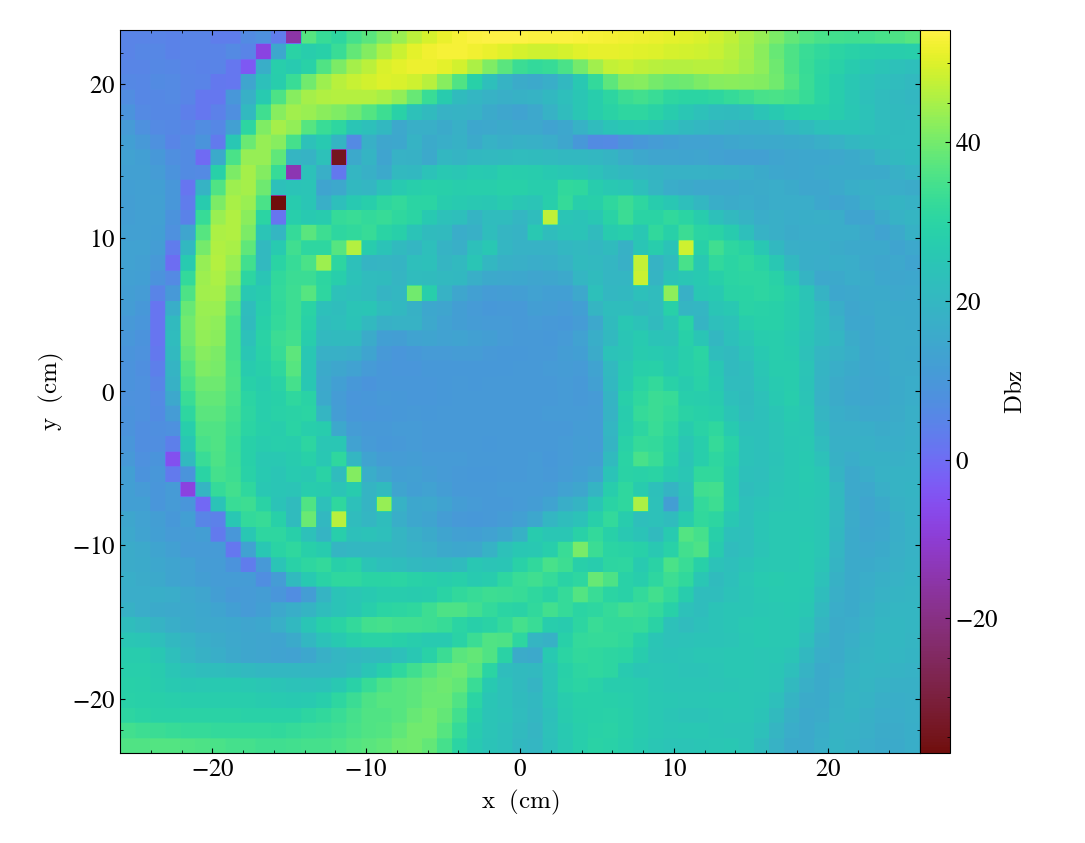

In [4]:
yt_ds = ds.yt.load_uniform_grid(fields=['dbz'], sel_dict={'time':0}, length_unit='m')

slc = yt.SlicePlot(yt_ds, 'z', ('stream', 'dbz'))
slc.set_log(('stream', 'dbz'), False)

The default behavior passes `sel_dict` to the xarray `.isel` method, but you can instead provide a dictionary to use with the `sel` method by setting the `sel_dict_type` keyword to `sel`:

yt : [INFO     ] 2022-10-17 14:34:26,427 Parameters: current_time              = 5500.0
yt : [INFO     ] 2022-10-17 14:34:26,428 Parameters: domain_dimensions         = [51 48 53]
yt : [INFO     ] 2022-10-17 14:34:26,429 Parameters: domain_left_edge          = [ 4.99999989e-03  5.22499990e+00 -6.56500006e+00]
yt : [INFO     ] 2022-10-17 14:34:26,430 Parameters: domain_right_edge         = [ 0.505       5.69500017 -6.04500008]
yt : [INFO     ] 2022-10-17 14:34:26,430 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-10-17 14:34:26,499 xlim = -6.565000 -6.045000
yt : [INFO     ] 2022-10-17 14:34:26,500 ylim = 5.225000 5.695000
yt : [INFO     ] 2022-10-17 14:34:26,500 xlim = -6.565000 -6.045000
yt : [INFO     ] 2022-10-17 14:34:26,500 ylim = 5.225000 5.695000
yt : [INFO     ] 2022-10-17 14:34:26,503 Making a fixed resolution buffer of (('stream', 'dbz')) 800 by 800


('cartesian', ['z', 'y', 'x'])



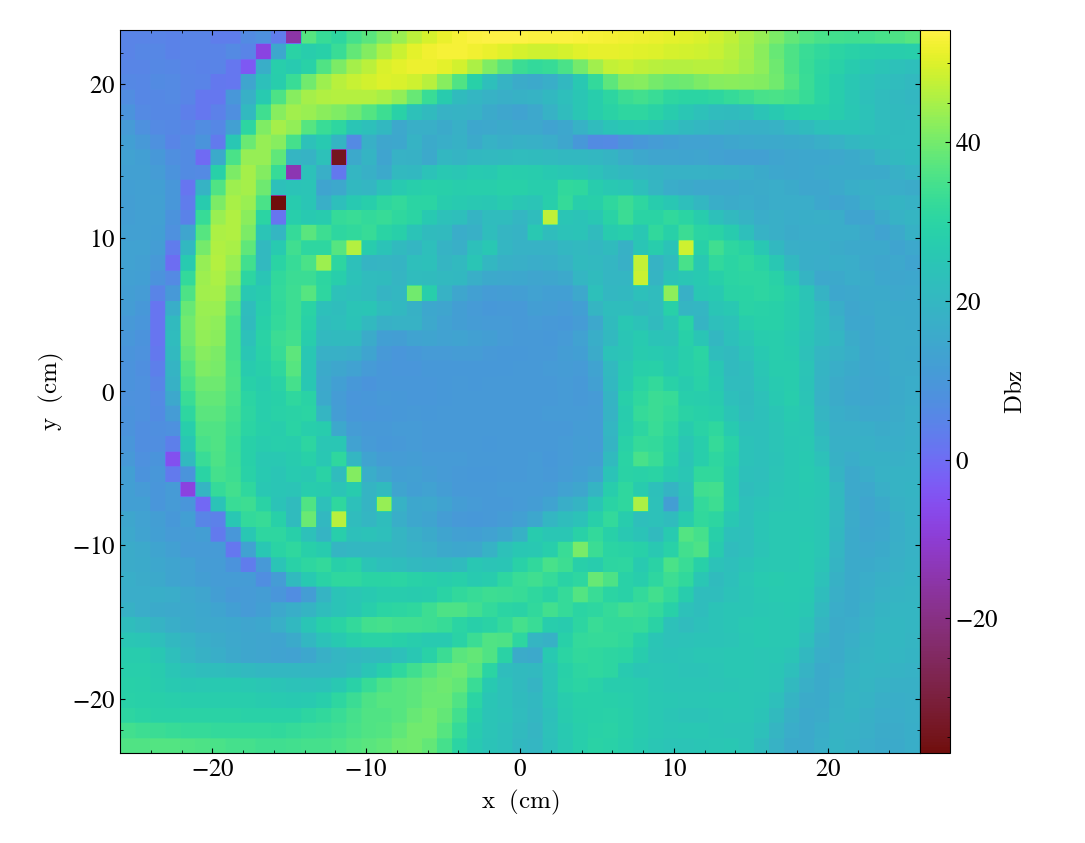

In [6]:
time_to_select = ds.time[0]
yt_ds = ds.yt.load_uniform_grid(fields=['dbz'], 
                                sel_dict={'time': time_to_select}, 
                                sel_dict_type="sel", 
                                length_unit='m')

slc = yt.SlicePlot(yt_ds, 'z', ('stream', 'dbz'))
slc.set_log(('stream', 'dbz'), False)